In [2]:
print("hellow world")

hellow world


In [3]:

import ipyvolume as ipv
import numpy as np

In [12]:
x = np.array([[-1, -0.8], [1, -0.1], [0., 0.5]])
y = np.array([0.0, 0.0])
z = np.array([0.0, 0.0])
ipv.figure()
s = ipv.scatter(x, y, z, marker='sphere', size=10)
ipv.xyzlim(-1, 1)
ipv.animation_control(s) # shows controls for animation controls
ipv.show()

In [11]:
s.sequence_index = 1

In [18]:
u = np.linspace(-10, 10, 25)
x, y = np.meshgrid(u, u)
r = np.sqrt(x**2+y**2)
print("x,y and z are of shape", x.shape)
# and turn them into 1d
x = x.flatten()
y = y.flatten()
r = r.flatten()
print("and flattened of shape", x.shape)

x,y and z are of shape (25, 25)
and flattened of shape (625,)


In [19]:
time = np.linspace(0, np.pi*2, 15)
z = np.array([(np.cos(r + t) * np.exp(-r/5)) for t in time])
print("z is of shape", z.shape)

z is of shape (15, 625)


In [26]:
ipv.figure()
s = ipv.scatter(x, z, y, marker="sphere")
ipv.animation_control(s, interval=200)
ipv.ylim(-3,3)
ipv.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 270


In [27]:
color = np.array([[np.cos(r + t), 1-np.abs(z[i]), 0.1+z[i]*0] for i, t in enumerate(time)])
size = (z+1)
print("color is of shape", color.shape)

color is of shape (15, 3, 625)


In [28]:
color = np.transpose(color, (0, 2, 1))

In [30]:
def set_view(figure, framenr, fraction):
    ipv.view(fraction*360, (fraction - 0.5) * 180, distance=2 + fraction*2)
    s.size = size*(2+0.5*np.sin(fraction * 6 * np.pi))
ipv.movie('wave.gif', set_view, fps=20, frames=40)

Output()


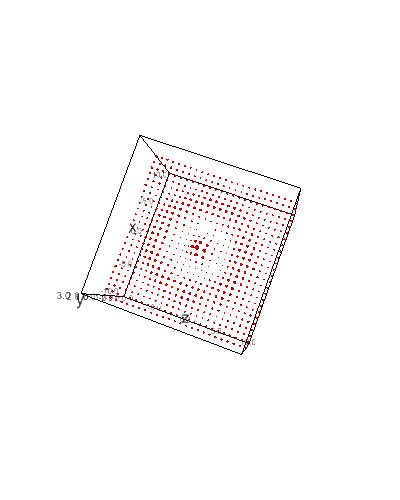

In [32]:
import IPython.display
import base64
with open('wave.gif', 'rb') as gif:
    url = b"data:image/gif;base64," +base64.b64encode(gif.read())
IPython.display.Image(url=url.decode('ascii'))

In [4]:
import ipyvolume.datasets
stream = ipyvolume.datasets.animated_stream.fetch()
print("shape of steam data", stream.data.shape) # first dimension contains x, y, z, vx, vy, vz, then time, then particl

shape of steam data (6, 200, 1250)


In [6]:

fig = ipv.figure()
# instead of doing x=stream.data[0], y=stream.data[1], ... vz=stream.data[5], use *stream.data
# limit to 50 timesteps to avoid having a huge notebook
q = ipv.quiver(*stream.data[:,0:50,:200], color="red", size=7)
ipv.style.use("dark") # looks better
ipv.animation_control(q, interval=200)
ipv.show()